In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lefs_cython.simple import LEFSimulator, constants
import lefs_cython
lefs_cython.LEFSimulator = LEFSimulator
colors = [
    'red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 
    'magenta', 'yellow', 'black', 'lime', 'teal', 'navy'
]

def calculate_coverage(segments, L):
    # Sort the segments based on the starting point, and then by the ending point
    segments = sorted(segments, key=lambda x: (x[0], x[1]))

    merged_segments = []
    current_start, current_end = segments[0]

    for start, end in segments[1:]:
        if start <= current_end:  # There is an overlap
            current_end = max(current_end, end)
        else:  # No overlap, push the current segment to the merged list
            merged_segments.append((current_start, current_end))
            current_start, current_end = start, end
    
    # Append the last segment
    merged_segments.append((current_start, current_end))
    
    # Calculate the total coverage
    total_coverage = sum(end - start for start, end in merged_segments)
    
    return total_coverage

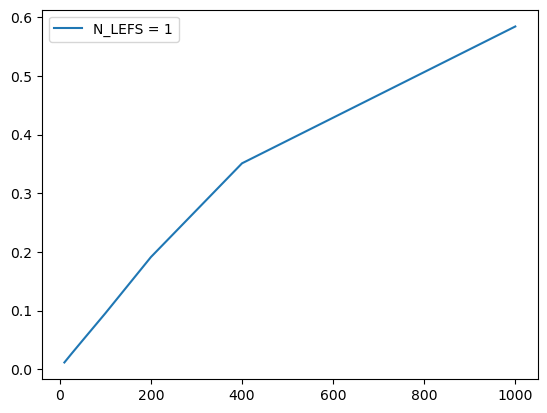

In [2]:
N = 1000
d = 500
for N_LEFS in [1]: 
    # v = 0.5 # 2 leg velocity
    r_u = 1/400 
    coverages = []
    for r_u in 1/np.array([1000,400, 200,100, 50, 25, 10]):
        processivity = 1/(r_u*2)
        LEF_steps = 100000
        steps_per_LEF_step = int(5200/2)
        load_array = 1 * np.ones((N, 5))
        unload_array = np.ones((N, 5))/(processivity)  # 200 steps to unload
        capture_array = np.zeros((N, 2))  # no CTCF
        release_array = np.zeros(N)
        pause_array = np.zeros(N)  # no pausing
        right_positions = []
        LEF = LEFSimulator(N_LEFS, N, load_array, unload_array, capture_array, release_array, pause_array, skip_load=True)
        positions = []
        for k in range(LEF_steps):
            LEF.steps(k,k+1)
            LEF.get_LEFs()
            positions.append(LEF.get_LEFs())
        positions = np.array(positions) 
        # for k in range(N_LEFS):
        #     # plt.plot(positions[:,k,:], color = colors[k] )
        # plt.show()
        total_coverage = []
        for k in range(LEF_steps):
            coverage = calculate_coverage(positions[k,:,:], N)
            total_coverage.append(coverage)
        total_coverage = np.array(total_coverage)
        coverages.append(total_coverage)
        # plt.plot(total_coverage)
        # plt.show()
        # print(total_coverage.mean())
        # plt.hist(total_coverage)
    coverages = np.array(coverages)
    plt.plot(np.array([1000,400, 200,100, 50, 25, 10]), coverages.mean(axis=1)/N, label = f'N_LEFS = {N_LEFS}')
    plt.legend()

In [3]:
import numpy as np

def calculate_coverage_within_subset(segments, l1, l2):
    # Filter and adjust segments to be within [l1, l2]
    adjusted_segments = []
    for start, end in segments:
        if end < l1 or start > l2:
            continue  # Skip segments that are completely outside [l1, l2]
        adjusted_start = max(start, l1)
        adjusted_end = min(end, l2)
        adjusted_segments.append((adjusted_start, adjusted_end))
    
    if not adjusted_segments:
        return 0
    
    # Sort the adjusted segments by their starting points; if they are the same, sort by their ending points
    adjusted_segments = sorted(adjusted_segments, key=lambda x: (x[0], x[1]))
    
    merged_segments = []
    current_start, current_end = adjusted_segments[0]
    
    for start, end in adjusted_segments[1:]:
        if start <= current_end:  # There is an overlap
            current_end = max(current_end, end)
        else:  # No overlap, add the previous segment to merged segments
            merged_segments.append((current_start, current_end))
            current_start, current_end = start, end
    
    # Add the last segment
    merged_segments.append((current_start, current_end))
    
    # Calculate the total coverage within [l1, l2]
    total_coverage = sum(end - start for start, end in merged_segments)
    
    return total_coverage

# Example usage
segments = np.array([
    [1, 3],
    [4, 6],
    [5, 8],
    [10, 12]
])
l1, l2 = 4, 10

total_coverage_within_subset = calculate_coverage_within_subset(segments, l1, l2)
print("Total Coverage within subset [4, 10]:", total_coverage_within_subset)


Total Coverage within subset [4, 10]: 4


ValueError: x and y must have same first dimension, but have shapes (7,) and (1,)

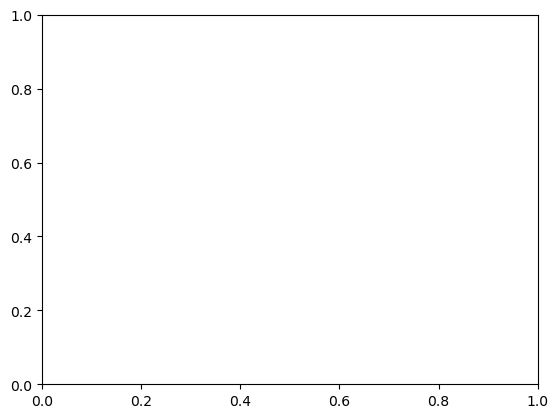

In [4]:
for N_LEFS in [1]: 
    # v = 0.5 # 2 leg velocity
    r_u = 1/400 
    coverages = []
    for r_u in 1/np.array([200]):
        processivity = 1/(r_u*2)
        LEF_steps = 10000
        steps_per_LEF_step = int(5200/2)
        load_array = 1 * np.ones((N, 5))
        unload_array = np.ones((N, 5))/(processivity)  # 200 steps to unload
        capture_array = np.zeros((N, 2))  # no CTCF
        release_array = np.zeros(N)
        pause_array = np.zeros(N)  # no pausing
        right_positions = []
        LEF = LEFSimulator(N_LEFS, N, load_array, unload_array, capture_array, release_array, pause_array, skip_load=True)
        positions = []
        for k in range(LEF_steps):
            LEF.steps(k,k+1)
            LEF.get_LEFs()
            positions.append(LEF.get_LEFs())
        positions = np.array(positions) 
        total_coverage = []
        for k in range(LEF_steps):
            coverage = calculate_coverage_within_subset(positions[k,:,:], 250, 250+360)
            total_coverage.append(coverage)
        total_coverage = np.array(total_coverage)
        coverages.append(total_coverage)
    coverages = np.array(coverages)
    plt.plot(np.array([1000,400, 200,100, 50, 25, 10]), coverages.mean(axis=1)/N, label = f'N_LEFS = {N_LEFS}')
    plt.legend()

In [5]:
3000/400

7.5

[0.2397313]


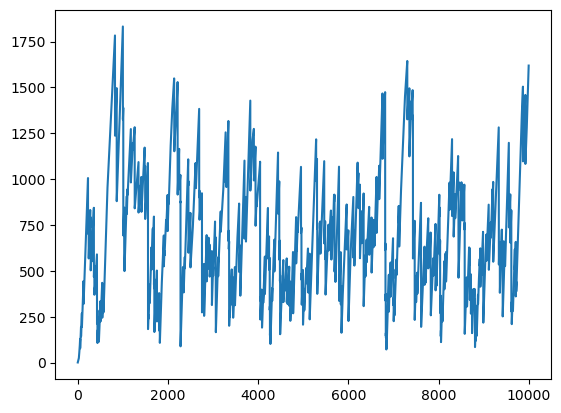

In [6]:
N = 3000
for N_LEFS in [4]: 
    # v = 0.5 # 2 leg velocity
    r_u = 1/800 
    coverages = []
    for r_u in 1/np.array([200]):
        processivity = 1/(r_u*2)
        LEF_steps = 10000
        steps_per_LEF_step = int(5200/2)
        load_array = 1 * np.ones((N, 5))
        unload_array = np.ones((N, 5))/(processivity)  # 200 steps to unload
        capture_array = np.zeros((N, 2))  # no CTCF
        release_array = np.zeros(N)
        pause_array = np.zeros(N)  # no pausing
        right_positions = []
        LEF = LEFSimulator(N_LEFS, N, load_array, unload_array, capture_array, release_array, pause_array, skip_load=True)
        positions = []
        for k in range(LEF_steps):
            LEF.steps(k,k+1)
            LEF.get_LEFs()
            positions.append(LEF.get_LEFs())
        positions = np.array(positions) 
        total_coverage = []
        for k in range(LEF_steps):
            coverage = calculate_coverage_within_subset(positions[k,:,:], 250, 250+360)
            coverage = calculate_coverage(positions[k,:,:], N)
            total_coverage.append(coverage)
        total_coverage = np.array(total_coverage)
        coverages.append(total_coverage)
    coverages = np.array(coverages)
    print(coverages.mean(axis=1)/N)
    plt.plot(total_coverage)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_non_overlapping_segments(num_segments, L, segment_length_range):
    segments = []
    while len(segments) < num_segments:
        start = random.uniform(0, L)
        length = random.uniform(*segment_length_range)
        end = min(start + length, L)
        
        # Check for overlap with existing segments
        overlap = False
        for s, e in segments:
            if (start < e and end > s):
                overlap = True
                break
        
        if not overlap:
            segments.append((start, end))
    return np.array(segments)

def calculate_coverage_within_subset(segments, l1, l2):
    total_coverage = 0
    
    for start, end in segments:
        if end < l1 or start > l2:
            continue  # Skip segments that are completely outside [l1, l2]
        
        # Calculate the overlap with the subset [l1, l2]
        overlap_start = max(start, l1)
        overlap_end = min(end, l2)
        overlap_length = max(0, overlap_end - overlap_start)
        
        # Subtract the part outside [l1, l2]
        outside_length = (l1 - start if start < l1 else 0) + (end - l2 if end > l2 else 0)
        segment_coverage = overlap_length - outside_length
        
        total_coverage += segment_coverage
    
    # Ensure coverage is non-negative
    total_coverage = max(0, total_coverage)
    
    return total_coverage

def plot_segments_and_coverage(segments, L, l1, l2):
    total_coverage = calculate_coverage_within_subset(segments, l1, l2)

    # Plot the segments
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for start, end in segments:
        ax.plot([start, end], [0, 0], label=f'Segment [{start:.2f}, {end:.2f}]', linewidth=5, alpha=0.3)
    
    # Highlight the subset [l1, l2]
    ax.axvspan(l1, l2, color='yellow', alpha=0.2, label=f'Subset [{l1}, {l2}]')
    
    # Highlight the coverage within the subset (for visualization purposes)
    adjusted_segments = []
    for start, end in segments:
        if end < l1 or start > l2:
            continue
        overlap_start = max(start, l1)
        overlap_end = min(end, l2)
        adjusted_segments.append((overlap_start, overlap_end))
    
    for start, end in adjusted_segments:
        ax.plot([start, end], [0.5, 0.5], color='red', linewidth=5, label=f'Coverage [{start:.2f}, {end:.2f}]')
    
    # Set plot limits and labels
    ax.set_xlim(0, L)
    ax.set_ylim(-1, 1)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.title(f'Segments and Coverage within [{l1}, {l2}] (Total Coverage: {total_coverage})')
    plt.show()

# Example usage
L = 20
num_segments = 10
segment_length_range = (1, 5)
segments = generate_non_overlapping_segments(num_segments, L, segment_length_range)
l1, l2 = 5, 15

plot_segments_and_coverage(segments, L, l1, l2)


KeyboardInterrupt: 

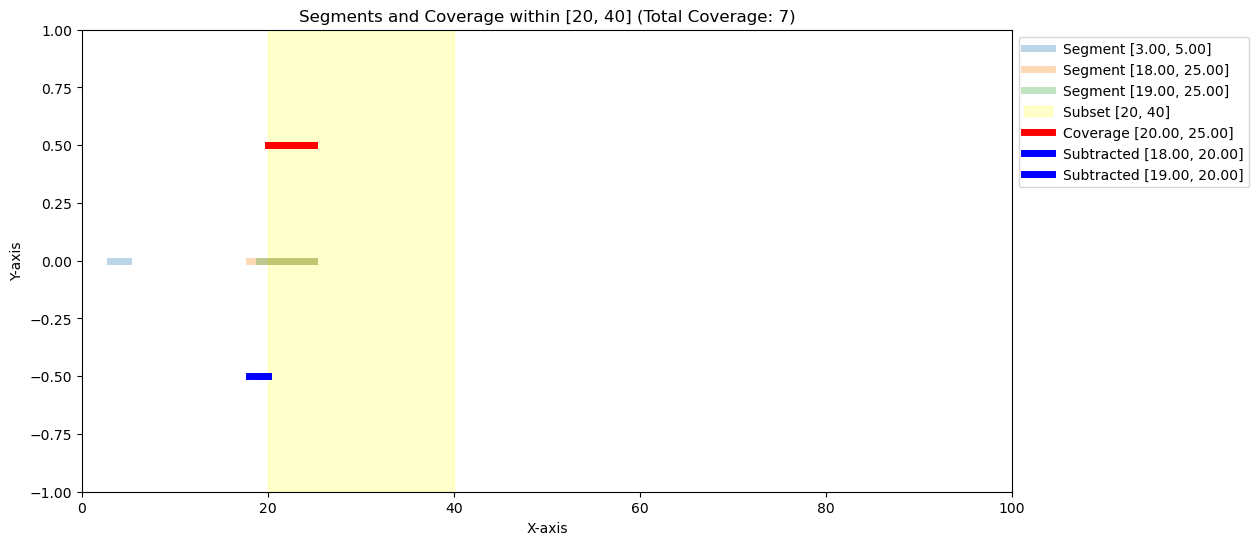

(7, [(20, 25), (20, 25)], [(18, 20), (19, 20)])


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_non_overlapping_segments(num_segments, L, segment_length_range):
    segments = []
    while len(segments) < num_segments:
        start = random.uniform(0, L)
        length = random.uniform(*segment_length_range)
        end = min(start + length, L)
        
        # Check for overlap with existing segments
        overlap = False
        for s, e in segments:
            if (start < e and end > s):
                overlap = True
                break
        
        if not overlap:
            segments.append((start, end))
    return np.array(segments)

def calculate_coverage_within_subset(segments, l1, l2):
    total_coverage = 0
    coverage_segments = []
    subtracted_segments = []

    for start, end in segments:
        if end < l1 or start > l2:
            continue  # Skip segments that are completely outside [l1, l2]
        
        # Calculate the overlap with the subset [l1, l2]
        overlap_start = max(start, l1)
        overlap_end = min(end, l2)
        overlap_length = max(0, overlap_end - overlap_start)
        
        # Subtract the part outside [l1, l2]
        outside_length = (l1 - start if start < l1 else 0) + (end - l2 if end > l2 else 0)
        segment_coverage = overlap_length - outside_length
        
        total_coverage += segment_coverage

        if overlap_length > 0:
            coverage_segments.append((overlap_start, overlap_end))
        
        if start < l1:
            subtracted_segments.append((start, l1))
        if end > l2:
            subtracted_segments.append((l2, end))
    
    # Ensure coverage is non-negative
    total_coverage = max(0, total_coverage)
    
    return total_coverage, coverage_segments, subtracted_segments

def plot_segments_and_coverage(segments, L, l1, l2):
    total_coverage, coverage_segments, subtracted_segments = calculate_coverage_within_subset(segments, l1, l2)

    # Plot the segments
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for start, end in segments:
        ax.plot([start, end], [0, 0], label=f'Segment [{start:.2f}, {end:.2f}]', linewidth=5, alpha=0.3)
    
    # Highlight the subset [l1, l2]
    ax.axvspan(l1, l2, color='yellow', alpha=0.2, label=f'Subset [{l1}, {l2}]')
    
    # Highlight the coverage within the subset
    for start, end in coverage_segments:
        ax.plot([start, end], [0.5, 0.5], color='red', linewidth=5, label=f'Coverage [{start:.2f}, {end:.2f}]')
    
    # Highlight the subtracted parts
    for start, end in subtracted_segments:
        ax.plot([start, end], [-0.5, -0.5], color='blue', linewidth=5, label=f'Subtracted [{start:.2f}, {end:.2f}]')
    
    # Set plot limits and labels
    ax.set_xlim(0, L)
    ax.set_ylim(-1, 1)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.title(f'Segments and Coverage within [{l1}, {l2}] (Total Coverage: {total_coverage})')
    plt.show()

# Example usage
L = 100
num_segments = 10
segments = [[3,5], [18, 25], [19, 25], ]
l1, l2 = 20, 40

plot_segments_and_coverage(segments, L, l1, l2)
print(calculate_coverage_within_subset(segments, l1, l2))


In [39]:
import numpy as np

def calculate_coverage_within_subset(segments, l1, l2):
    # Filter and adjust segments to be within [l1, l2]
    adjusted_segments = []
    for start, end in segments:
        if end < l1 or start > l2:
            continue  # Skip segments that are completely outside [l1, l2]
        adjusted_start = max(start, l1)
        adjusted_end = min(end, l2)
        adjusted_segments.append((adjusted_start, adjusted_end))
    
    if not adjusted_segments:
        return 0
    
    # Sort the adjusted segments by their starting points; if they are the same, sort by their ending points
    adjusted_segments = sorted(adjusted_segments, key=lambda x: (x[0], x[1]))
    
    merged_segments = []
    current_start, current_end = adjusted_segments[0]
    
    for start, end in adjusted_segments[1:]:
        if start <= current_end:  # There is an overlap
            current_end = max(current_end, end)
        else:  # No overlap, add the previous segment to merged segments
            merged_segments.append((current_start, current_end))
            current_start, current_end = start, end
    
    # Add the last segment
    merged_segments.append((current_start, current_end))
    
    # Calculate the total coverage within [l1, l2]
    total_coverage = sum(end - start for start, end in merged_segments)
    
    return total_coverage

# Example usage
segments = np.array([
    [1, 3],
    [4, 6],
    [5, 8],
    [10, 12]
])
l1, l2 = 4, 10

total_coverage_within_subset = calculate_coverage_within_subset(segments, l1, l2)
print("Total Coverage within subset [4, 10]:", total_coverage_within_subset)


Total Coverage within subset [4, 10]: 4


In [44]:
import numpy as np

def merge_segments(segments):
    if len(segments) == 0:
        return []
    
    # Sort the segments by their start times (and end times in case of tie)
    segments = sorted(segments, key=lambda x: (x[0], x[1]))
    
    merged = []
    current_start, current_end = segments[0]
    
    for start, end in segments[1:]:
        if start <= current_end:  # Overlap
            current_end = max(current_end, end)
        else:  # No overlap
            merged.append((current_start, current_end))
            current_start, current_end = start, end
    
    merged.append((current_start, current_end))
    return merged

def calculate_coverage_within_subset(segments, l1, l2):
    # First, merge overlapping segments
    merged_segments = merge_segments(segments)
    total_coverage = 0

    for start, end in merged_segments:
        # Calculate the overlap with the subset [l1, l2]
        overlap_start = max(start, l1)
        overlap_end = min(end, l2)

        if overlap_start < overlap_end:  # There is an overlap
            overlap_length = overlap_end - overlap_start
            total_coverage += overlap_length

    return total_coverage

# Test with a predefined set of segments
segments = np.array([

    [1, 3],
    [4, 9],
    [14, 18],
    [13, 17]
])

l1, l2 = 5, 15

# Calculate coverage
total_coverage = calculate_coverage_within_subset(segments, l1, l2)

total_coverage


6

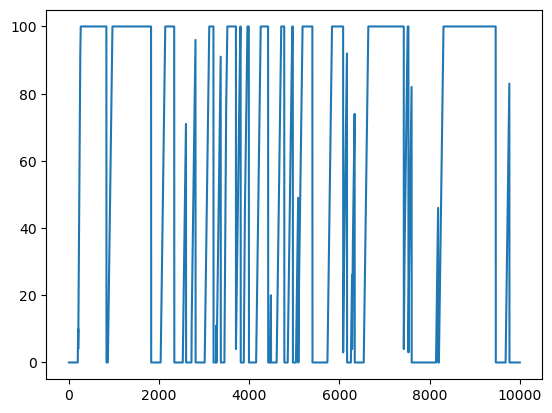

In [46]:
def run_sim(N, N_LEFS, LEF_steps, processivity):

    steps_per_LEF_step = int(5200/2)
    load_array = 1 * np.ones((N, 5))
    unload_array = np.ones((N, 5))/(processivity)  # 200 steps to unload
    capture_array = np.zeros((N, 2))  # no CTCF
    release_array = np.zeros(N)
    pause_array = np.zeros(N)  # no pausing

    positions = []
    LEF = LEFSimulator(N_LEFS, N, load_array, unload_array, capture_array, release_array, pause_array, skip_load=False)
    for k in range(LEF_steps):
        LEF.steps(k,k+1)
        LEF.get_LEFs()
        positions.append(LEF.get_LEFs())
    return np.array(positions)

LEF_steps = 10000
N_LEFS = 1
N = 1000
processivity = 200
position = run_sim(N, N_LEFS, LEF_steps, processivity)
coverage = []
for pos in position:
    coverage.append(calculate_coverage_within_subset(pos, 300, 400))
coverage = np.array(coverage)
plt.plot(coverage)

In [42]:
calculate_coverage_within_subset(position[1,:,:], 250, 250+360)

[(26, 32), (61, 66), (148, 153), (154, 159), (166, 172), (198, 204), (318, 323), (347, 352), (405, 410), (433, 438), (532, 538), (547, 553), (574, 579), (592, 597), (628, 634), (637, 643), (678, 684), (686, 690), (691, 695), (746, 751), (759, 765), (798, 804), (832, 838), (875, 881), (915, 921), (932, 938), (948, 954), (959, 964), (970, 976), (990, 996)]


42

In [24]:
N = 1000
l1 = 300
l2 = 663
N_LEFS = 4



for N_LEFS in [4]: 
    # v = 0.5 # 2 leg velocity
    r_u = 1/800 
    coverages = []
    for r_u in 1/np.array([200]):
        
        unload_array = np.ones((N, 5))/(processivity)  # 200 steps to unload
        
        
        
        positions = np.array(positions) 
        total_coverage = []
        for k in range(LEF_steps):
            coverage = calculate_coverage_within_subset(positions[k,:,:], 250, 250+360)
            coverage = calculate_coverage(positions[k,:,:], N)
            total_coverage.append(coverage)
        total_coverage = np.array(total_coverage)
        coverages.append(total_coverage)
    coverages = np.array(coverages)
    print(coverages.mean(axis=1)/N)
    plt.plot(total_coverage)

(2, [(4, 6), (5, 8)], [(3, 4), (10, 12)])